In [13]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

LEEMOS DATASET ORIGINAL PARA FILTRAR FEATURES Y DATOS NO DESEADOS

In [14]:
df_orig = pd.read_csv(r"./heart_failure_clinical_records_dataset.csv")

In [15]:
df_orig.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [16]:
# df_orig.isnull().any()    # NO HAY NULLS/NaN
# df_orig.info()            # NO HAY VARIABLES CATEGORICAS QUE NECESITEN ENCODE

In [17]:
df_cleaned = df_orig.drop(["time"],axis=1)  # SACAMOS EL FEATURE TIME 

In [18]:
df_cleaned.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [45]:
props_binarias = ["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]
props_continuas = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium"]

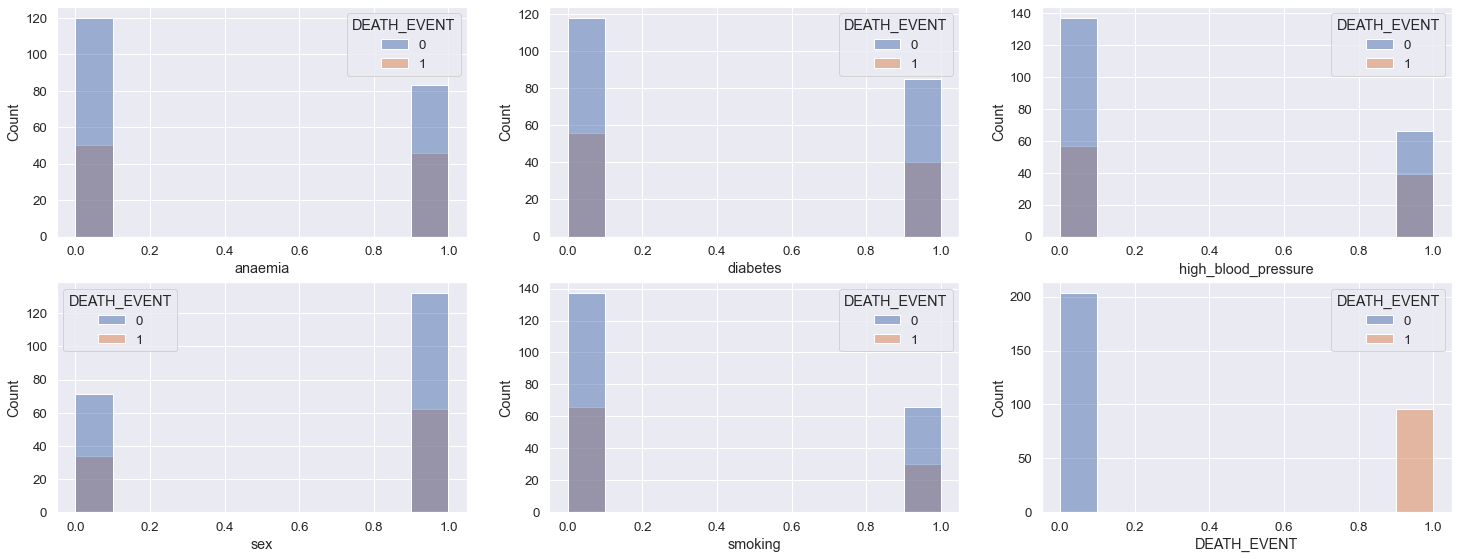

In [66]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(25, 60))
for idx,feature in enumerate(props_binarias):
    plt.subplot(df_cleaned.shape[1],3,idx+1)
    sns.histplot(data=df_cleaned,x=df_cleaned[feature],hue="DEATH_EVENT")

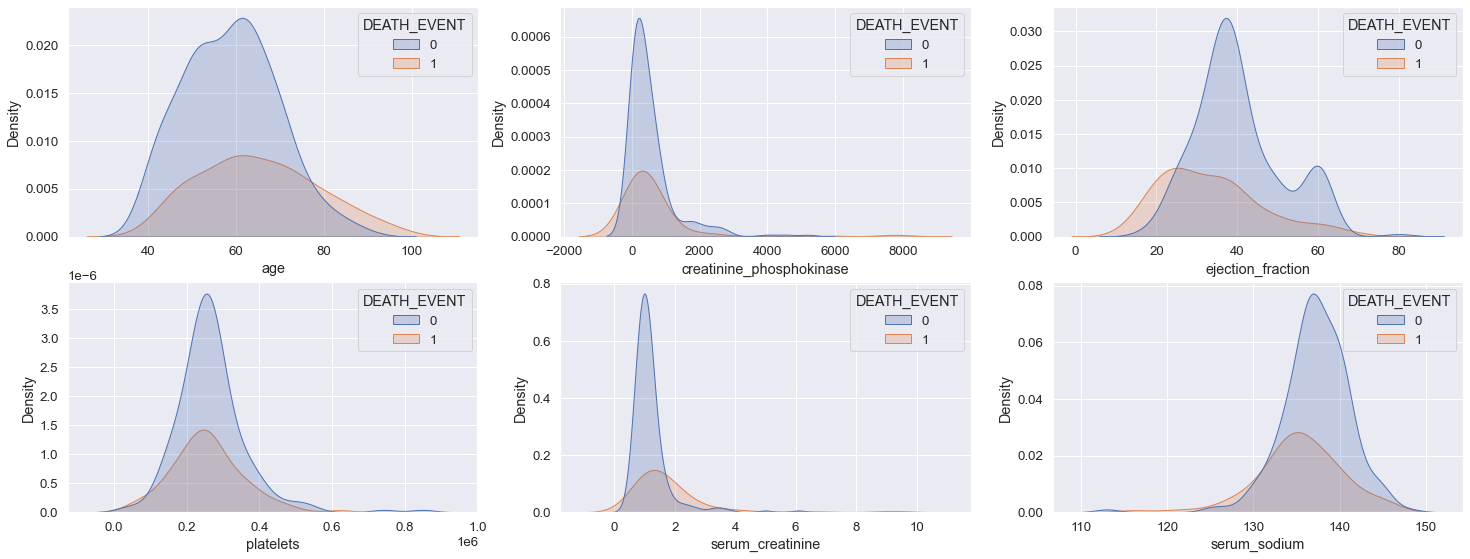

In [67]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(25, 60))
for idx,feature in enumerate(props_continuas):
    plt.subplot(df_cleaned.shape[1],3,idx+1)
    sns.kdeplot(data=df_cleaned,x=df_cleaned[feature],hue="DEATH_EVENT",shade="fill")